<a href="https://colab.research.google.com/github/mayssao/Text_Analysis_Final_Project/blob/main/mo2942_Mayssa_Otayek_intro_to_text_analysis_Python_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exploring Independent Media Perspectives on the 2019 October Revolution in Lebanon

---


## 1. Installing relevant libraries and mounting Google Drive

REFERENCE: [Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)



In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
from google.colab import drive
import os
import glob
import nltk

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive



## 2. Importing the CSV file and converting it to a dataframe

REFERENCE: [Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)



Step 1: The first step involves importing the manually constructed CSV file.


In [ ]:
# Import CSV file with manually picked list of relevant articles
csv_file = "/content/drive/MyDrive/articles.csv"


Step 2: In order to use this dataset, we need to bring it into our Python environment. For this we will use the Pandas library.


In [ ]:
# Convert the CSV file into a dataframe
articles_df = pd.read_csv(csv_file, delimiter=",", encoding = "utf-8")

In [ ]:
articles_df

,Article Title,Media outlet,Date written,Link
0,Beirut’s Protests: The Uprising of the “Post-V...,Daraj,10-18-2019,https://daraj.media/en/42845/
1,Thousands of Anti-Government Protesters Take T...,Beirut Today,10-18-2019,https://beirut-today.com/2019/10/18/thousands-...
2,"And Now From Beirut: ""Down With the Regime""",Raseef22,10-20-2019,https://raseef22.net/english/article/1075628-a...
3,Lebanon Protests: The End of the Longstanding ...,Beirut Today,10-20-2019,https://beirut-today.com/2019/10/20/lebanon-pr...
4,Lebanon’s Hezbollah and Amal Parties Unite Aga...,Raseef22,10-21-2019,https://raseef22.net/english/article/1075638-l...
...,...,...,...,...
80,"Oligarchiyya, Lebanese style (Part 2 of 2)",The Public Source,02-05-2020,https://thepublicsource.org/lebanese-oligarchy
81,A look at the Global Corruption Barometer resu...,Beirut Today,02-07-2020,https://beirut-today.com/2020/02/07/global-cor...
82,Lessons from Greece (Part 1 of 2),The Public Source,02-08-2020,https://thepublicsource.org/lessons-greece-1
83,Lebanon’s new political formula takes the coun...,Beirut Today,02-13-2020,https://beirut-today.com/2020/02/13/lebanon-po...


In [ ]:
# Convert the elements in the 'Date written' column from object, to datetime64 object
articles_df['Date written'] = pd.to_datetime(articles_df['Date written'], format = '%m-%d-%Y')


## 3. Web scrapping

REFERENCE: [ChatGPT](https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b), [Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)


Step 1: we design the function to web scrape an article:
The function uses `requests.get()` and `response.text()` code which allows us to get the text data.


In [ ]:
# Design the function to web scrape an article
# The following function has been adapted from Rebecca Krisel's web scraping workshop - https://github.com/rskrisel/web_scraping_workshop
import html
def scrape_article(url):
  response = requests.get(url)
  response.encoding = 'utf-8'
  html_string = response.text
  return html_string


Step 2: using a for loop, we apply our `scrape_article` function to the “Link” column of the DataFrame and create a new column "text" for the resulting extracted text.


In [ ]:
articles_df['text'] = articles_df['Link'].apply(scrape_article)


Step 3: we create a folder in our Google Drive which we will use to store all of the scraped articles.


In [ ]:
# Create the folder using the !mkdir command
!mkdir '/content/drive/MyDrive/Articles Lebanon'

mkdir: cannot create directory ‘/content/drive/MyDrive/Articles Lebanon’: File exists



Step 4: we run our data through a for loop and using our BeautifulSoup object to take only the relevant information from the HTML. We then save the data in files in our Articles Lebanon folder created above.


In [ ]:
# The following function has been adapted from Rebecca Krisel's web scraping workshop - https://github.com/rskrisel/web_scraping_workshop
id = 0

for text in articles_df['text']:

    # Clean up the HTML using BeautifulSoup
    soup = BeautifulSoup(text)
    article = soup.get_text()

    # Remove Arabic words using RegEx (ChatGPT)
    # A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
    # RegEx can be used to check if a string contains the specified search pattern.

    no_arabic_article = re.sub(r'[^a-zA-Z\s]', '', article)

    # Add the relevant information from each article in a file in the Articles Lebanon folder
    id += 1
    with open(f"/content/drive/MyDrive/Articles Lebanon/{id}_Article.txt", "w") as file:
        file.write(str(no_arabic_article))


## 4. Setting directory path for my research

REFERENCE: [Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)


In [ ]:
directory = "/content/drive/MyDrive/Articles Lebanon"
files = glob.glob(f"{directory}/*.txt")

In [ ]:
files

['/content/drive/MyDrive/Articles Lebanon/1_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/3_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/9_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/4_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/6_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/8_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/2_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/7_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/10_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/5_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/11_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/12_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/13_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/14_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/15_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/17_Article.txt',
 '/content/drive/MyDrive/Articles Lebanon/16_Article.txt',
 '/con


## 5. Function for text cleaning (useful for TF-IDF and Topic Modelling)

REFERENCE: [ChatGPT](https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b), [Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
from pathlib import Path
nltk.download('punkt')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True


Step 1: we create a function to derive the Part of Speech (POS) of given words. We will use this function to lemmatize our text based on the POS tag.


In [ ]:
# The following function has been adapted from Rebecca Krisel's web scraping workshop - https://github.com/rskrisel/web_scraping_workshop
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


Step 2: we design a list of custom stopwords, and add them to the stops list already created above.


In [ ]:
# The following code has been developped with the help of ChatGPT (https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b)
stops = stopwords.words('english')

# Custom stopwords
custom_stop_words = ['via', 'sic', 'pep', 'raseef', 'imagesvgxml','lebanonlaudy', 'readingthousands', 'aminlebanese', 'esc','bankbeirut','sharerelated','alltimour','provisionsbeirut','allsharetweet','el', 'al', 'u', "faq", 'multimedia', 'subscribeplease', 'enable', 'javascript', 'browser', 'submit', 'form', 'email', 'share', 'whatsapp', 'email', 'facebook', 'twitter', 'subscribe']

# Add custom stopwords to the set
stops.extend(custom_stop_words)


Step 3: we create a function that will serve to clean our articles:
* Opens the text file attached to the filepath and set it equal to the variable `"text"`
* Transforms the words in variable "text" into tokens and set it equal to the variable `"text_tokens"`
* Processes `"text_tokens"` for use with NLTK and set it equal to the variable `"nltk_text"`
* Make the tokens lower case and removes punctuation (`text_lower`), removes stop words (`text_stops`), lemmatizes the tokens (`text_clean`), and adds each token into one string (`text_string`).


In [ ]:
# The following code has been developped with the help of ChatGPT (https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b)
# and Rebecca Krisel's workshop on web scraping (https://github.com/rskrisel/web_scraping_workshop)
def clean_text(text):

    lemmatization_overrides = {
        'revolutionary': 'revolution', 'lebanese': 'lebanon', 'protester': 'protest', 'neoliberalism': 'neoliberal', 'politics': 'political',
        'sectarianism':'sectarian', 'oligarchiyya':'oligarch', 'oligarchy' : 'oligarch' # Add more overrides as needed
        # 'word_to_override': 'desired_lemma',
    }

    # Tokenize, lowercase, remove stopwords and non-alphabetic words
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalpha()]
    text_stops = [t for t in text_lower if t not in stops]

    # Manually override lemmatization, and lemmatize other words
    text_clean = [lemmatization_overrides.get(t, WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t))) for t in text_stops]
    text_stops_1 = [t for t in text_clean if t not in stops]
    text_string = ' '.join(text_stops_1)
    return text_string


## 6. TF-IDF


### Import relevant libraries to perform TF-IDF

REFERENCE: [ChatGPT](https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b), [Krisel, 2023](https://github.com/rskrisel/tf-idf/blob/main/README.md)

In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_rows = 600
from pathlib import Path


### Calculate TF-IDF

REFERENCE: [ChatGPT](https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b), [Krisel, 2023](https://github.com/rskrisel/tf-idf/blob/main/README.md)


Step 1: we clean our articles using the `clean_text` function created above.


In [ ]:
# The following code has been developped with the help of ChatGPT (https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b)
# List to store cleaned articles
cleaned_articles = []

# Process each file
for file in files:
    text = open(file, encoding='utf-8').read()
    text_string = clean_text(text)
    cleaned_articles.append(text_string)


Step 2: we perform TF-IDF using the `TfidVectorizer` function from the `sklearn` library imported above.


In [ ]:
# The following code has been developped with the help of Rebecca Krisel's workshop of TF-IDF (https://github.com/rskrisel/tf-idf/blob/main/README.md)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cleaned_articles)
feature_names = vectorizer.get_feature_names_out()


Step 3: create a dataframe with the calculated TF-IDF of each word.


In [ ]:
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)


Step 4: we use the stack function to reorganize the DataFrame so that the words are in rows rather than columns. We also need to reset the index to make sure the results became a dataframe and not a series object.


In [ ]:
tfidf_df.stack().reset_index()

,level_0,level_1,0
0,0,abandon,0.000000
1,0,abate,0.051117
2,0,abawiyyeh,0.000000
3,0,abbas,0.000000
4,0,abdel,0.000000
...,...,...,...
748165,84,zone,0.000000
748166,84,zouk,0.000000
748167,84,zoya,0.000000
748168,84,zuama,0.000000


In [ ]:
tfidf_df = tfidf_df.stack().reset_index()


Step 5: we rename our columns.


In [ ]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document number','level_1': 'term'})


Step 6: we find out the top 10 words with the highest TF-IDF for every story: we sort by document and TF-IDF score and then groupby document number and take the first 10 values.


In [ ]:
tfidf_df.sort_values(by=['document number','tfidf'], ascending=[True,False]).groupby(['document number']).head(10)

,document number,term,tfidf
3311,0,generation,0.289870
5653,0,party,0.182146
7779,0,syria,0.165056
8456,0,victory,0.157290
1049,0,brotherhood,0.140293
...,...,...,...
741925,84,elect,0.133612
747718,84,uprise,0.132229
745083,84,people,0.132121
741397,84,defense,0.125380


In [ ]:
top_tfidf = tfidf_df.sort_values(by=['document number','tfidf'], ascending=[True,False]).groupby(['document number']).head(10)
top_tfidf

,document number,term,tfidf
3311,0,generation,0.289870
5653,0,party,0.182146
7779,0,syria,0.165056
8456,0,victory,0.157290
1049,0,brotherhood,0.140293
...,...,...,...
741925,84,elect,0.133612
747718,84,uprise,0.132229
745083,84,people,0.132121
741397,84,defense,0.125380


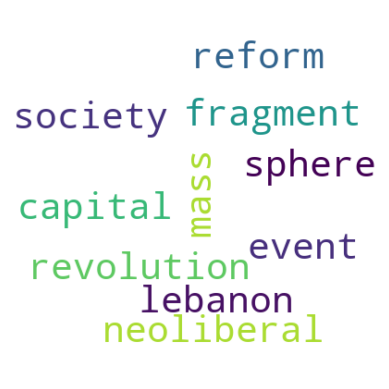

In [ ]:
# The following code has been developped with the help of ChatGPT (https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Design a wordcloud with top 10 words of a specific article
document_number = 13  # Change this to the article you're interested in

# Filter the DataFrame for the specific document number
top_tfidf_article_specific = top_tfidf[top_tfidf['document number'] == document_number]

# Concatenate the terms into a single string
terms = top_tfidf_article_specific['term'].astype(str).str.cat(sep=' ')

# Set the size of the WordCloud
width, height = 400, 400  # You can adjust these values according to your preference

# Generate the WordCloud with a white background
wordcloud = WordCloud(max_font_size=40, background_color='white', width=width, height=height).generate(terms)

# Display the WordCloud using matplotlib
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## 7. Topic modeling


### Text cleaning and analysis using topic modeling

REFERENCE:
[Krisel, 2023](https://github.com/rskrisel/topic_modeling_workshop)
[ChatGPT](https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b)


Import all relevant libraries.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import glob


Step 1: for topic modelling, we install and import tomotoby and seaborn libraries.


In [ ]:
!pip install tomotopy
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 40.9 MB/s eta 0:00:00


In [ ]:
import tomotopy as tp
import seaborn
import glob
from pathlib import Path


Step 2: we process with cleaning each article using a for loop and our `cleaned_text` function.


In [ ]:
# The following code has been developped with the help of ChatGPT (https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b)
# and Rebecca Krisel's workshop on topic modelling (https://github.com/rskrisel/topic_modeling_workshop)
training_data = []
original_texts = []
titles = []

for file in files:
    text = open(file, encoding='utf-8').read()
    text_string = clean_text(text)
    # Adds the processed text to 'training_data',
    # the non-processed original text to 'original_texts',
    # and the title of the article to our list 'titles'.
    training_data.append(text_string)
    original_texts.append(text)
    titles.append(Path(file).stem)

In [ ]:
len(training_data), len(original_texts), len(titles)

(85, 85, 85)


### Train topic model

REFERENCE:
[Krisel, 2023](https://github.com/rskrisel/topic_modeling_workshop)
[Antoniak, 2021](https://github.com/rskrisel/topic_modeling_workshop)


In [ ]:
# The following code has been developped with the help of Rebecca Krisel's workshop on topic modelling (https://github.com/rskrisel/topic_modeling_workshop)

# Number of topics to return
num_topics = 5
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after removing white space (strip)
# and splitting it up into words (split)
for text in training_data:
    model.add_doc(text.strip().split())

# The log-likelihood function is typically used to
# derive the maximum likelihood estimator of the parameter
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number+1}✨\n\n{topic_words}\n")

Iteration: 0	Log-likelihood: -8.767170136778795
Iteration: 10	Log-likelihood: -8.495297926942836
Iteration: 20	Log-likelihood: -8.419627121384643
Iteration: 30	Log-likelihood: -8.374618858124938
Iteration: 40	Log-likelihood: -8.3555833327088
Iteration: 50	Log-likelihood: -8.343730726136018
Iteration: 60	Log-likelihood: -8.332532111242108
Iteration: 70	Log-likelihood: -8.318567438094604
Iteration: 80	Log-likelihood: -8.314730015930888
Iteration: 90	Log-likelihood: -8.303931371707863

Topic Model Results:


✨Topic 1✨

lebanon political bank economic public state system power source debt

✨Topic 2✨

lebanon beirut political protest protester community voice see economy today

✨Topic 3✨

lebanon woman right freedom take ago join day country accept

✨Topic 4✨

revolution force security even go medium time street uprise like

✨Topic 5✨

public one new also movement people minister october many party



In [ ]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]


### Visualize topics over time

REFERENCE:
[Krisel, 2023](https://github.com/rskrisel/topic_modeling_workshop)
[Antoniak, 2021](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)



Step 1: we use [Antoniak, 2021](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)'s `make_md` and `get_top_docs` functions to extract information on top documents, probabilities and design.


*   List item
*   List item



In [ ]:
# The following code has been developped with the help of Rebecca Krisel's workshop on topic modelling (https://github.com/rskrisel/topic_modeling_workshop) and Maria Antoniak's Little Mallet Wrapper (https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)


from IPython.display import Markdown, display
# IPython means interactive Python. It is an interactive command-line terminal for Python.
import re
# A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
# RegEx can be used to check if a string contains the specified search pattern.

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return


Step 2: we use [Antoniak, 2021](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)'s `plot_topics_over_time` function to visualise our topic probability over the relevant time period.


In [ ]:
# The following code has been developped with the help of Rebecca Krisel's workshop on topic modelling (https://github.com/rskrisel/topic_modeling_workshop) and Maria Antoniak's Little Mallet Wrapper (https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)

def plot_topics_over_time(topic_distributions, topic_keys, times, topic_index, output_path=None):

    data_dicts = []
    for j, _distribution in enumerate(topic_distributions):
        for _topic, _probability in enumerate(_distribution):
            if _topic == topic_index:
                data_dicts.append({'Probability': _probability,
                                   'Time': times[j]})
    data_df = pd.DataFrame(data_dicts)

    sns.set(style='ticks', font_scale=1.2)
    plt.figure(figsize=(30,5))
    sns.lineplot(data=data_df,
                 x='Time',
                 y='Probability',
                 color='cornflowerblue',
                 lw=3)
    plt.xlabel('Time')
    plt.ylabel('Topic Probability')
    #plt.title(' '.join(topic_keys[topic_index][:5]))
    plt.title(make_md(f"### ✨Topic {topic_index+1}✨\n\n{' '.join(topic_keys[topic_index][:10])}\n\n---"))
    plt.tight_layout()
    sns.despine()
    if output_path:
        plt.savefig(output_path)
    plt.show()



In [ ]:
# The following code has been developped with the help of ChatGPT (https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b)

# Convert 'Date written' column in the article_df DataFrame to a list
times = articles_df['Date written'].tolist()


Step 3: we apply the `plot_topics_over_time ` function to visualise our results.


### ✨Topic 1✨

lebanon political bank economic public state system power source debt

---

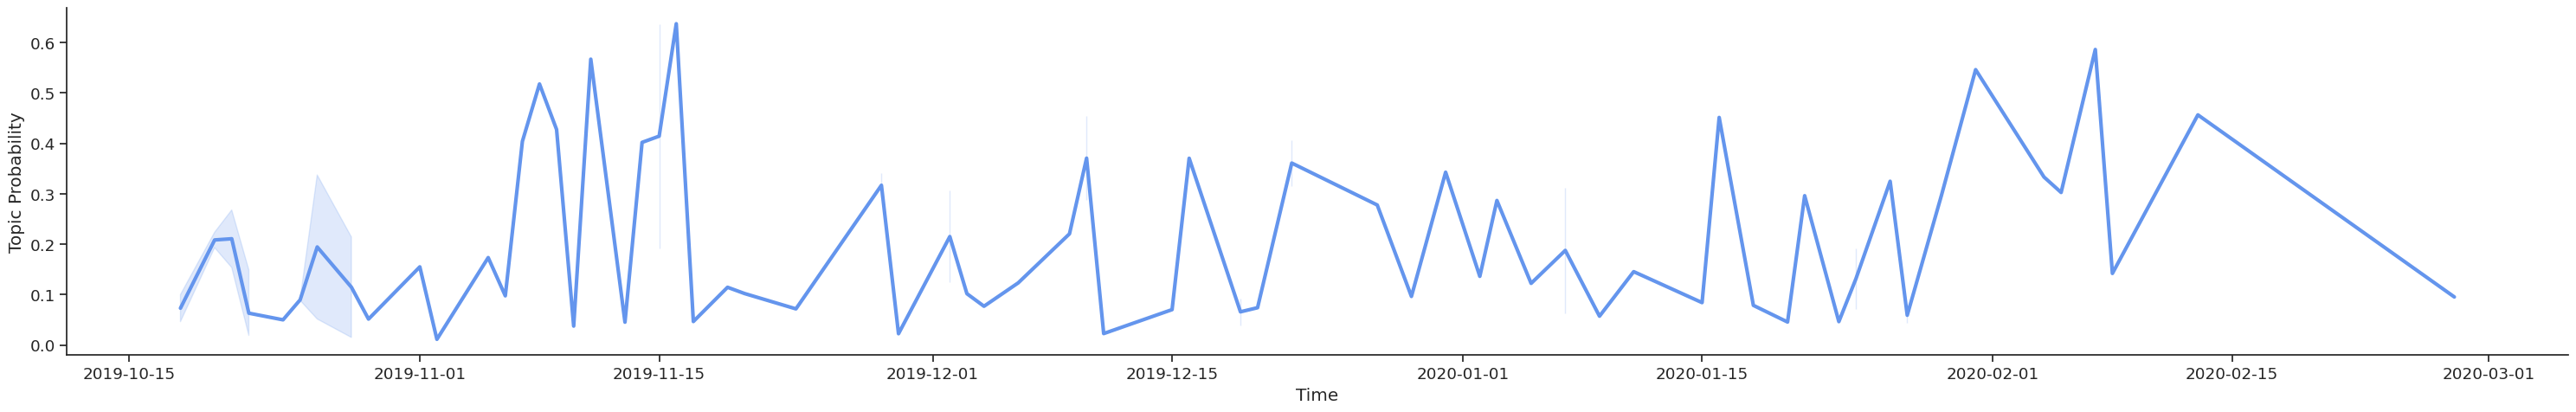

### ✨Topic 2✨

lebanon beirut political protest protester community voice see economy today

---

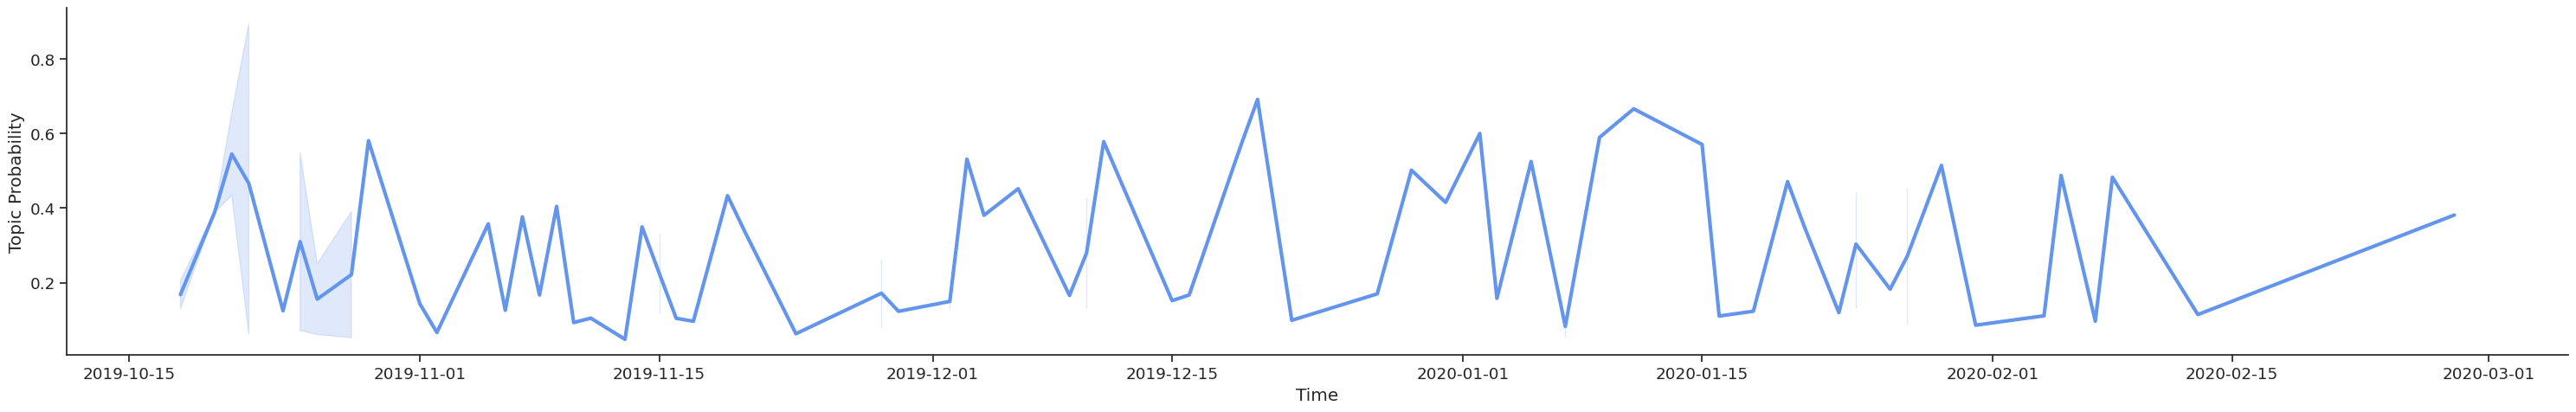

### ✨Topic 3✨

lebanon woman right freedom take ago join day country accept

---

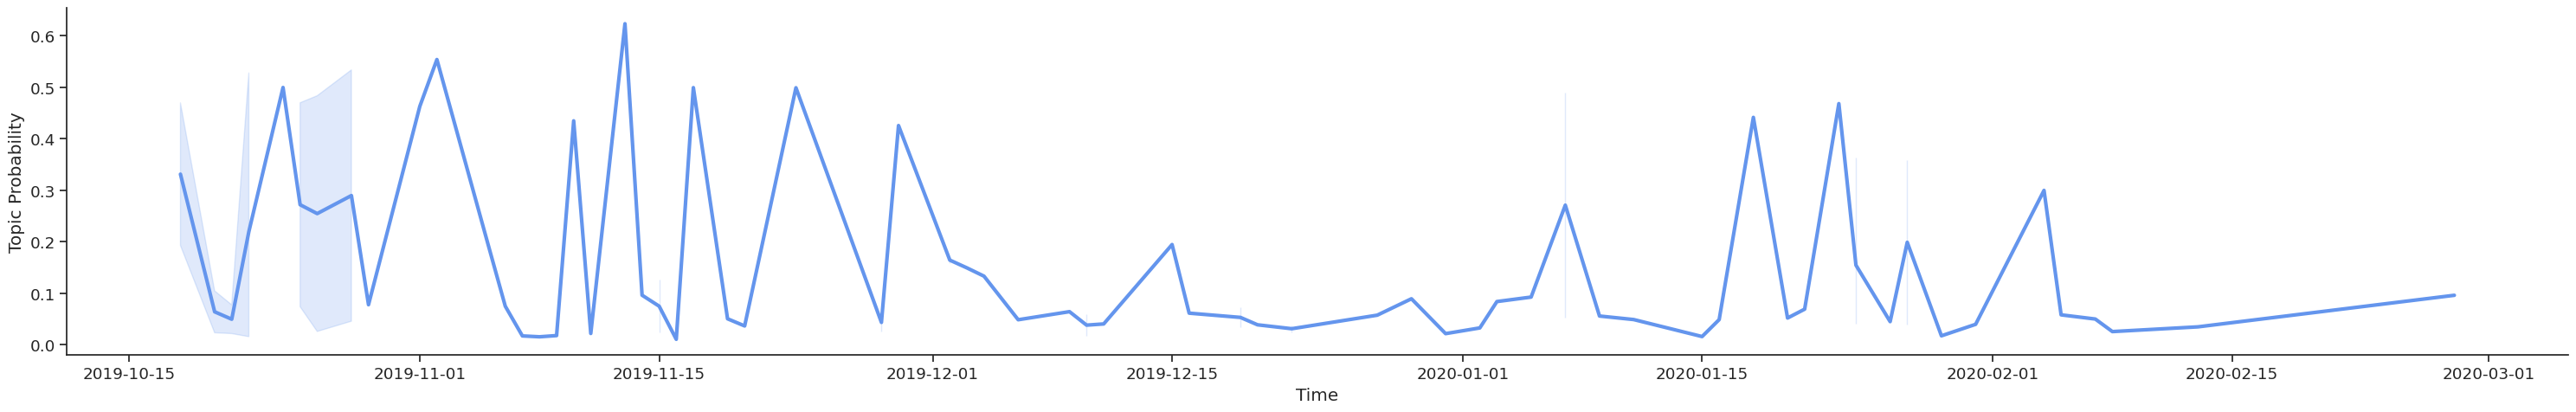

### ✨Topic 4✨

revolution force security even go medium time street uprise like

---

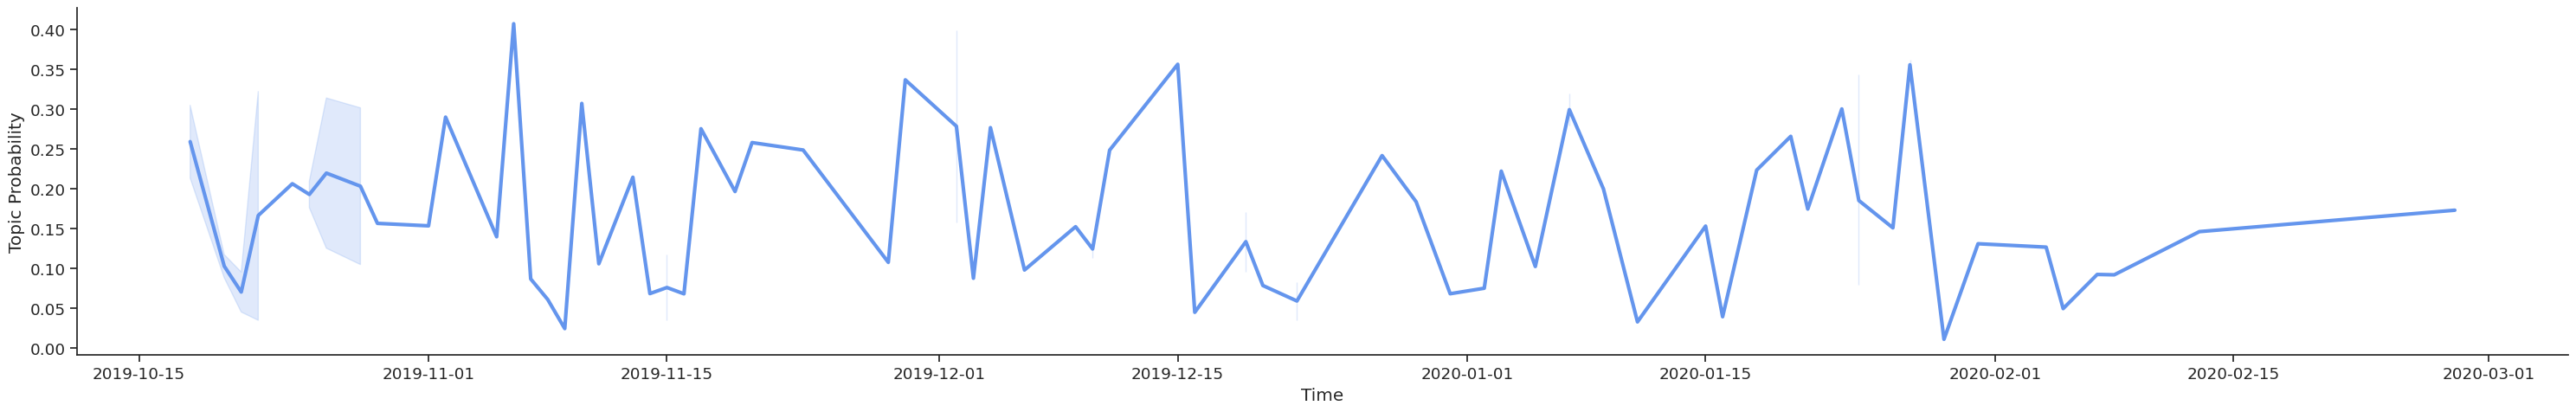

### ✨Topic 5✨

public one new also movement people minister october many party

---

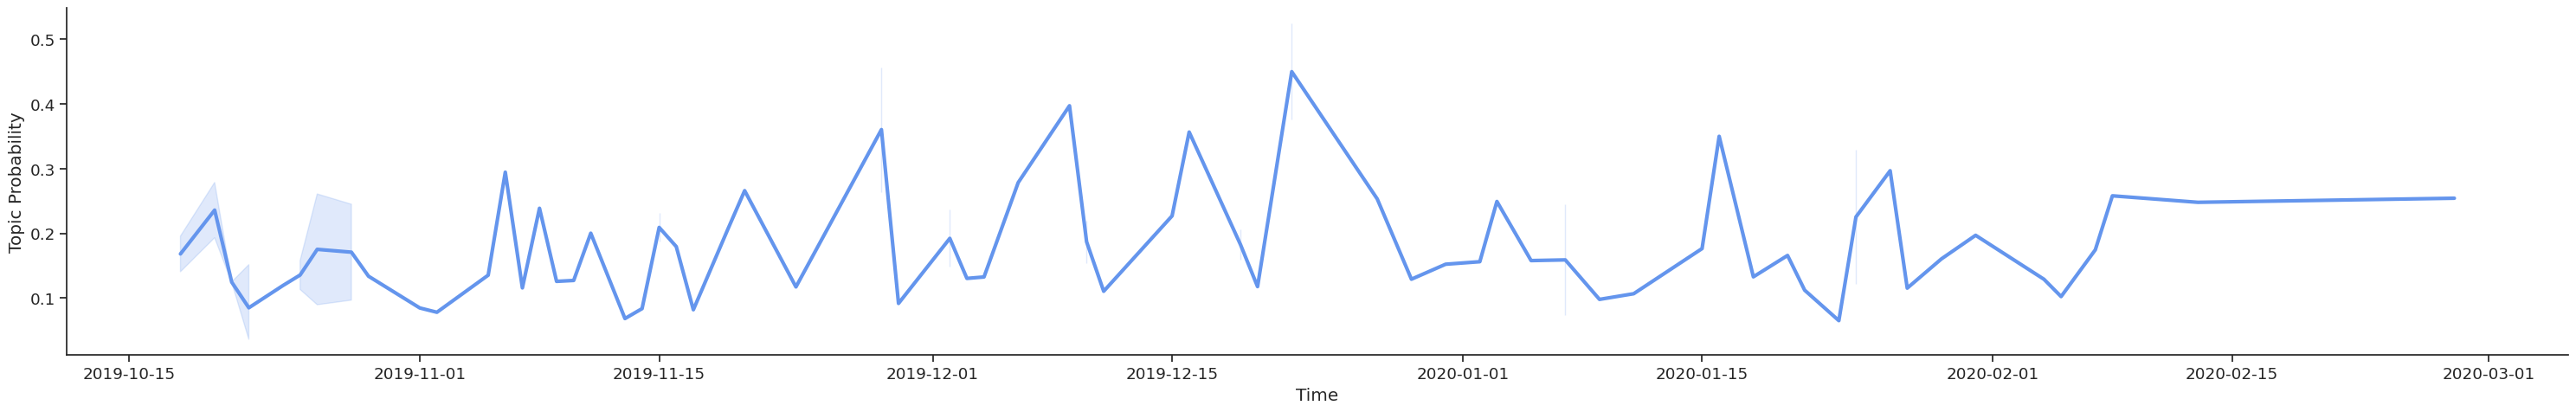

In [ ]:
# The following code has been developped with the help of ChatGPT (https://chat.openai.com/share/ffa9d588-1642-42f3-874f-bdf39549c53b)

import seaborn as sns
topics = []
topic_individual_words = []

for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
for topic_number in range(0, len(topic_individual_words)):
  plot_topics_over_time(topic_distributions, topic_individual_words, times, topic_number, output_path=None)


### Output topics to a CSV file

REFERENCE: [Krisel, 2023](https://github.com/rskrisel/topic_modeling_workshop)


In [ ]:
# The following code has been developped with the help of Rebecca Krisel's workshop on topic modelling (https://github.com/rskrisel/topic_modeling_workshop)

topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')


We save the CSV file into My Drive.


In [ ]:
path = '/content/drive/MyDrive'

In [ ]:
df.to_csv(f"{path}/Topic-Distributions.csv", encoding='utf-8', index=False)